<a href="https://colab.research.google.com/github/evoaway/ML-Zoomcamp/blob/main/Week3/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework3

[https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/03-classification/homework.md](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/03-classification/homework.md)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

## Dataset

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-04 13:18:03--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.12’

data.csv.12         100%[===================>]   1.41M  --.-KB/s    in 0.04s   

2023-10-04 13:18:04 (31.8 MB/s) - ‘data.csv.12’ saved [1475504/1475504]



In [3]:
df = pd.read_csv('data.csv')
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
del df["driven_wheels"]
del df["number_of_doors"]
del df["market_category"]
del df["engine_fuel_type"]
del df["vehicle_size"]
del df["popularity"]

In [5]:
df = df.rename(columns={'msrp':'price'})

In [6]:
df = df.fillna(0)

## Question 1
What is the most frequent observation (mode) for the column transmission_type?

In [7]:
df.transmission_type.value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

## Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

<ipython-input-8-0d18f9f02a63>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


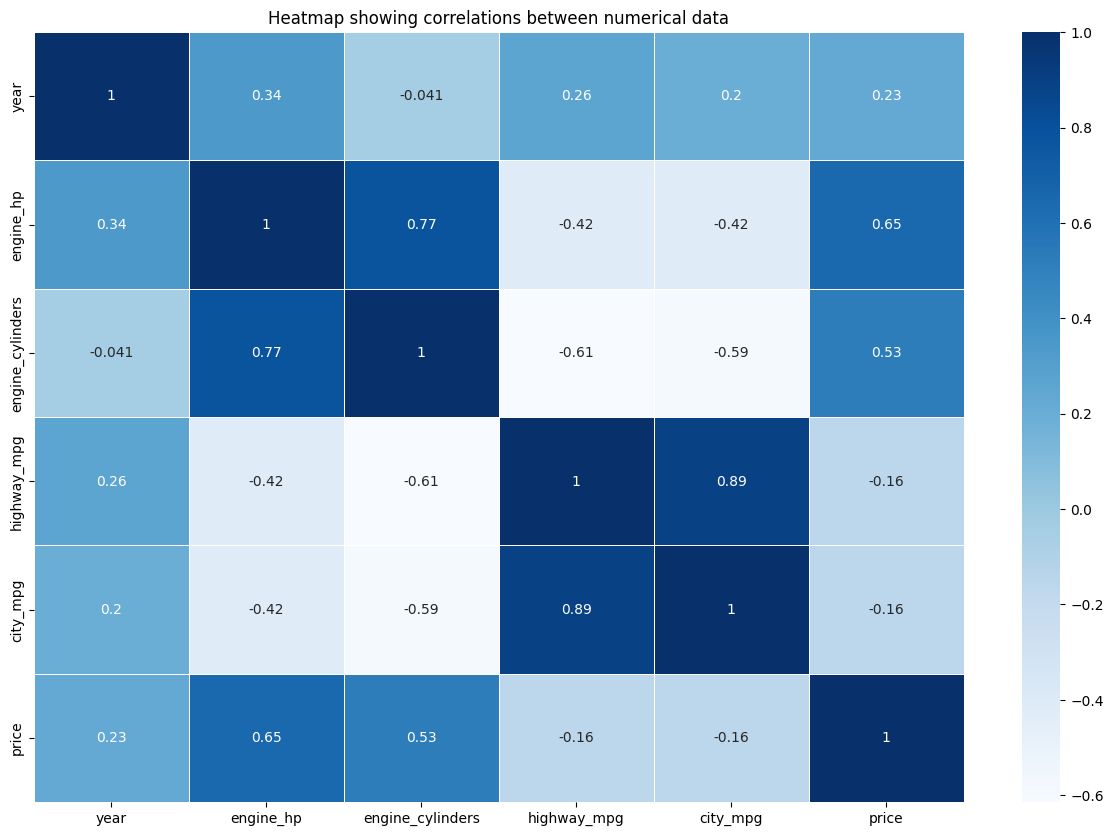

In [8]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sn.heatmap(corr_matrix,annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [9]:
corr_matrix.unstack().sort_values(ascending = False)[:15]

year              year                1.000000
engine_hp         engine_hp           1.000000
city_mpg          city_mpg            1.000000
highway_mpg       highway_mpg         1.000000
engine_cylinders  engine_cylinders    1.000000
price             price               1.000000
city_mpg          highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
price             engine_hp           0.650095
engine_hp         price               0.650095
engine_cylinders  price               0.526274
price             engine_cylinders    0.526274
engine_hp         year                0.338714
dtype: float64

In [10]:
mean_val = df.price.mean()
df_class = df.copy()
df_class['above_average'] = np.where(df['price']>=mean_val,1,0)
df_class.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [11]:
df_class = df_class.drop('price', axis=1)

In [12]:
df_full_train, df_test = train_test_split(df_class, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

## Question 3

*   Calculate the mutual information score between above_average and other
*   categorical variables in our dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).


In [15]:
df_class.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_average          int64
dtype: object

In [16]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'above_average']

In [17]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

In [18]:
def mutual_info_above_average_score(series):
    return mutual_info_score(series, df_full_train.above_average).round(2)

In [19]:
mi = df_full_train[categorical].apply(mutual_info_above_average_score)
mi.sort_values(ascending=False)

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

## Question 4


*   Now let's train a logistic regression.
*   Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
* To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
        model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.



In [20]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [21]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [22]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.93


## Question 5

* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

In [23]:
small = ['year','engine_hp','transmission_type','city_mpg']
features = list(df_train.columns)

In [24]:
orig_score = accuracy

for c in small:
    subset = features.copy()
    subset.remove(c)

    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)

    print(c, orig_score - score, score)

year -0.01838438942509435 0.9483843894250944
engine_hp -0.004955937893411644 0.9349559378934117
transmission_type -0.015027276542173729 0.9450272765421738
city_mpg -0.015866554762903884 0.9458665547629039


## Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
* This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.


In [25]:
df_lin = df.copy()
df_lin['price'] = np.log1p(df_lin['price'])
df_lin.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,10.739349
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,10.612779
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,10.500977
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,10.290483
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,10.448744


In [26]:
df_full_train, df_test = train_test_split(df_lin, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [27]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [28]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [29]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = np.sqrt(mean_squared_error(y_val, y_pred))

    print(a, round(score, 4))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.486


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.486


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.486


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.486
10 0.4862


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
